<a href="https://colab.research.google.com/github/econeutics/18065/blob/main/cs181_pset4_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 181 HW4 Problem 2**
---

#### Initialize data:

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)  # download MNIST
N = 6000

x = mnist_trainset.data[:N]  # select N datapoints
x = x.flatten(1)             # flatten the images
x = x.float()                # convert pixels from uint8 to float
x = x.numpy()              # uncomment to use numpy (optional)

100%|██████████| 9912422/9912422 [00:00<00:00, 91175005.31it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23457725.37it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21781168.87it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4160412.48it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#### **Todo:** implement PCA

*Hint: see `.linalg.svd()`*

In [ ]:
def pca(x, n_comps=500):

  #Define the M projection matrix

  i = np.linspace(1,1, x.shape[0]).reshape(-1,1)
  M = np.identity(x.shape[0]) - (i@i.T)/(i.T@i)

  #Taking VLV' of the empirical cov matrix (X'Mx), then
  #Principal components X*V'= (USV')(V)= US
  x_cov = x.T@M@x
  U,S,V = np.linalg.svd(x_cov)

  V = V.T

  top_eigvals = S[:n_comps]
  top_pcomps = x@V[:,:n_comps]
  return top_eigvals, top_pcomps, V

#### **Todo:** calculate cumulative fraction of variance

*Hint: see `.cumsum()`*

In [ ]:
def calc_cfvs(eigvals):
    cum_frac_vars = eigvals.cumsum()/eigvals.sum()
    return cum_frac_vars

#### **Todo:** calculate mean squared L2 norm reconstruction loss

In [ ]:
def calc_errs(x, pcomps):
    V = pca(x)[2]
    k = pcomps.shape[1]

    #Reconstructed matrices (500, 10 components)
    x_hat = pcomps@V[:,:k].T
    x_hat_10pc = pcomps[:,:10]@V[:,:10].T

    #Mean of per-column norm of the element difference
    err_mean = np.mean(((x-x_hat)**2).sum(axis =0))
    err_pcomp = np.mean(((x-x_hat_10pc)**2).sum(axis =0))
    return err_mean, err_pcomp

#### Plot and print errors:

In [ ]:
def plot_pic(pic, ax, title=''):
    x = pic.reshape(28, 28)
    ax.imshow(x, cmap='binary')
    ax.set_title(title)
    ax.axis('off')

def make_plots(eigvals, cfvs, x_mean, pcomps, V):
    # plot eigenvals and cfvs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    ax1.plot(eigvals, color='tomato')
    ax1.set_title('Eigenvalues')
    ax2.plot(cfvs, color='tomato')
    ax2.set_title('CFVs')
    fig.savefig('p2_cfvs.pdf')

    # plot mean
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    plot_pic(x_mean, ax, title='Mean')
    fig.savefig('p2_mean.pdf')

    # plot top 10 pcomps
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        plot_pic(V[:,i], axes.flat[i], title=f'PC index {i}')
    fig.savefig('p2_pcomps.pdf')

Reconstruction error (using mean): 1.589863e+04
Reconstruction error (using mean and top 10 pcomps): 1.469870e+07


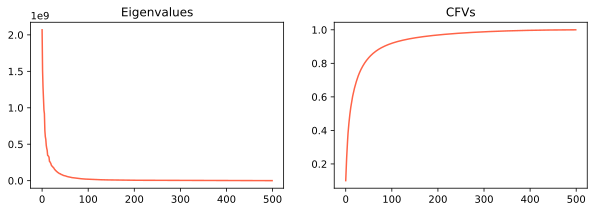

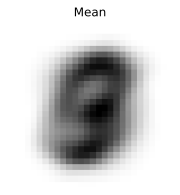

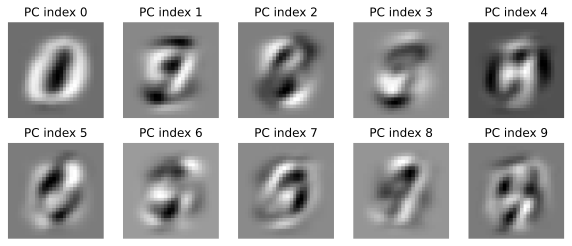

In [ ]:
# do PCA
eigvals, pcomps, V = pca(x)

# calculate CFVs
fcvs = calc_cfvs(eigvals)

# print errors
err_mean, err_pcomp = calc_errs(x, pcomps)
print(f'Reconstruction error (using mean): {err_mean:3e}')
print(f'Reconstruction error (using mean and top 10 pcomps): {err_pcomp:3e}')

# make plots
make_plots(eigvals, fcvs, x.mean(0), pcomps, V)
